In [1]:
from asim.training.models.sim_agent.smart.smart import SMART
from asim.training.models.sim_agent.smart.smart_config import SMARTConfig

from asim.common.visualization.color.color import TAB_10

import torch

import matplotlib.pyplot as plt
import numpy as np

In [2]:


config = SMARTConfig()
smart_model = SMART(config)
smart_model

SMART(
  (token_processor): TokenProcessor()
  (encoder): SMARTDecoder(
    (map_encoder): SMARTMapDecoder(
      (type_pt_emb): Embedding(10, 128)
      (polygon_type_emb): Embedding(4, 128)
      (light_pl_emb): Embedding(5, 128)
      (r_pt2pt_emb): FourierEmbedding(
        (freqs): Embedding(3, 64)
        (mlps): ModuleList(
          (0-2): 3 x Sequential(
            (0): Linear(in_features=129, out_features=128, bias=True)
            (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (2): ReLU(inplace=True)
            (3): Linear(in_features=128, out_features=128, bias=True)
          )
        )
        (to_out): Sequential(
          (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=128, out_features=128, bias=True)
        )
      )
      (pt2pt_layers): ModuleList(
        (0-2): 3 x AttentionLayer()
      )
      (token_emb): MLPEmbedding(
        (mlp): Sequential(
        

In [3]:
from pathlib import Path
import pickle

training_path = Path("/home/daniel/nuplan_cache/training")
pickle_paths = list(training_path.iterdir())

idx = 1

with open(pickle_paths[idx], "rb") as f:
    data = pickle.load(f)
data


{'scenario_id': '63efeb2cc874548e',
 'map_save': {'traj_pos': array([[[ -93.97004766,   39.8877303 ],
          [ -96.47004355,   39.88320337],
          [ -98.97003945,   39.87867644]],
  
         [[ -98.97003945,   39.87867644],
          [-101.47003535,   39.87414951],
          [-103.97003125,   39.86962258]],
  
         [[ -94.05841061,   32.71069424],
          [ -96.55840776,   32.71446555],
          [ -99.05840491,   32.71823686]],
  
         ...,
  
         [[  85.06544661,   39.81086751],
          [  87.32478311,   39.07656392],
          [  86.2213663 ,   37.3531457 ]],
  
         [[  86.2213663 ,   37.3531457 ],
          [  83.74308781,   37.02430573],
          [  84.2640319 ,   36.96820064]],
  
         [[  84.2640319 ,   36.96820064],
          [  85.64182234,   37.01653246],
          [  87.01986511,   37.05747969]]], shape=(1753, 3, 2)),
  'traj_theta': array([-3.13978188, -3.13978188,  3.14008413, ..., -0.08373943,
          3.00127745,  0.03541582], shape=(1

In [4]:
for key in data.keys():
    print(f"{key}:")
    try:
        for part_key, part_data  in data[key].items():
            if isinstance(part_data, (torch.Tensor, np.ndarray)):
                print(f"  {part_key}:")
                print(f"    Tensor: shape: {list(part_data.shape)}, dtype: {part_data.dtype}")
            else:
                print(f"  {part_key}: {type(part_data)} - {part_data}")
                print(f"    {type(part_data)} - {part_data}")

    except:
        print(f"    {data[key]}")

scenario_id:
    63efeb2cc874548e
map_save:
  traj_pos:
    Tensor: shape: [1753, 3, 2], dtype: float64
  traj_theta:
    Tensor: shape: [1753], dtype: float64
pt_token:
  type:
    Tensor: shape: [1753], dtype: uint8
  pl_type:
    Tensor: shape: [1753], dtype: uint8
  light_type:
    Tensor: shape: [1753], dtype: uint8
  num_nodes: <class 'int'> - 1753
    <class 'int'> - 1753
agent:
  num_nodes: <class 'int'> - 120
    <class 'int'> - 120
  valid_mask:
    Tensor: shape: [120, 91], dtype: bool
  role:
    Tensor: shape: [120, 3], dtype: bool
  id:
    Tensor: shape: [120], dtype: int64
  type:
    Tensor: shape: [120], dtype: uint8
  position:
    Tensor: shape: [120, 91, 3], dtype: float64
  heading:
    Tensor: shape: [120, 91], dtype: float64
  velocity:
    Tensor: shape: [120, 91, 2], dtype: float64
  shape:
    Tensor: shape: [120, 3], dtype: float32


In [5]:
"""
map_save:
  traj_pos:
    Tensor: shape: [3013, 3, 2], dtype: torch.float32
  traj_theta:
    Tensor: shape: [3013], dtype: torch.float32
pt_token:
  type:
    Tensor: shape: [3013], dtype: torch.uint8
  pl_type:
    Tensor: shape: [3013], dtype: torch.uint8
  light_type:
    Tensor: shape: [3013], dtype: torch.uint8
  num_nodes: <class 'int'> - 3013
    <class 'int'> - 3013
agent:
  num_nodes: <class 'int'> - 48
    <class 'int'> - 48
  valid_mask:
    Tensor: shape: [48, 91], dtype: torch.bool
  role:
    Tensor: shape: [48, 3], dtype: torch.bool
  id:
    Tensor: shape: [48], dtype: torch.int64
  type:
    Tensor: shape: [48], dtype: torch.uint8
  position:
    Tensor: shape: [48, 91, 3], dtype: torch.float32
  heading:
    Tensor: shape: [48, 91], dtype: torch.float32
  velocity:
    Tensor: shape: [48, 91, 2], dtype: torch.float32
  shape:
    Tensor: shape: [48, 3], dtype: torch.float32
scenario_id:
    5e1ba6c841ae6ccd
"""

"\nmap_save:\n  traj_pos:\n    Tensor: shape: [3013, 3, 2], dtype: torch.float32\n  traj_theta:\n    Tensor: shape: [3013], dtype: torch.float32\npt_token:\n  type:\n    Tensor: shape: [3013], dtype: torch.uint8\n  pl_type:\n    Tensor: shape: [3013], dtype: torch.uint8\n  light_type:\n    Tensor: shape: [3013], dtype: torch.uint8\n  num_nodes: <class 'int'> - 3013\n    <class 'int'> - 3013\nagent:\n  num_nodes: <class 'int'> - 48\n    <class 'int'> - 48\n  valid_mask:\n    Tensor: shape: [48, 91], dtype: torch.bool\n  role:\n    Tensor: shape: [48, 3], dtype: torch.bool\n  id:\n    Tensor: shape: [48], dtype: torch.int64\n  type:\n    Tensor: shape: [48], dtype: torch.uint8\n  position:\n    Tensor: shape: [48, 91, 3], dtype: torch.float32\n  heading:\n    Tensor: shape: [48, 91], dtype: torch.float32\n  velocity:\n    Tensor: shape: [48, 91, 2], dtype: torch.float32\n  shape:\n    Tensor: shape: [48, 3], dtype: torch.float32\nscenario_id:\n    5e1ba6c841ae6ccd\n"

Text(0.5, 1.0, 'map_save/traj_pos')

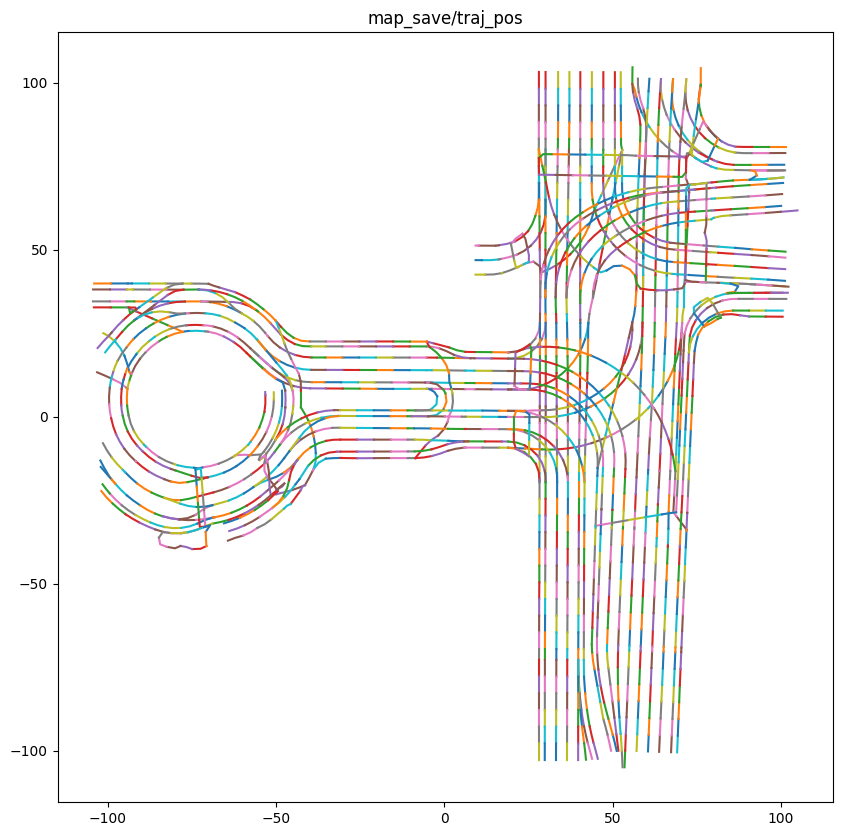

In [6]:

# 1. map_save:
#   traj_pos:
#     Tensor: shape: [3013, 3, 2], dtype: torch.float32
#   traj_theta:
#     Tensor: shape: [3013], dtype: torch.float32



fig, ax = plt.subplots(figsize=(10, 10))

traj_pos = data['map_save']['traj_pos']
for i in range(traj_pos.shape[0], ):
    ax.plot(traj_pos[i, :, 0], traj_pos[i, :, 1])

ax.set_title("map_save/traj_pos")


(array([[  32.,   31.,   32.,   27.,   35.,   46.,   36.,   28.,   56.,
         1430.],
        [  31.,   30.,   34.,   28.,   40.,   42.,   43.,   28.,   54.,
         1423.]]),
 array([1.00589858e-03, 2.50905309e-01, 5.00804719e-01, 7.50704129e-01,
        1.00060354e+00, 1.25050295e+00, 1.50040236e+00, 1.75030177e+00,
        2.00020118e+00, 2.25010059e+00, 2.50000000e+00]),
 <a list of 2 BarContainer objects>)

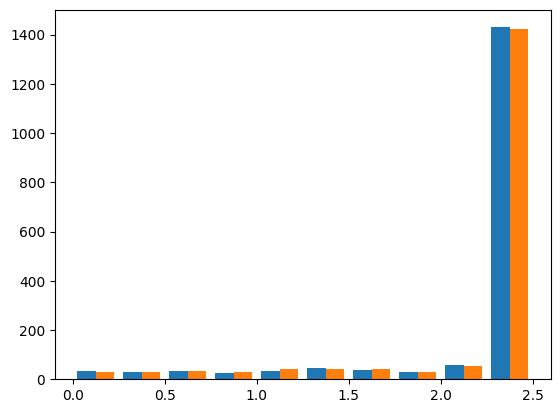

In [7]:
distance = np.linalg.norm(traj_pos[:, :-1] - traj_pos[:, 1:], axis=-1)

# min_x, min_y = np.min(traj_pos[:, :, 0]), np.min(traj_pos[:, :, 1])
# max_x, max_y = np.max(traj_pos[:, :, 0]), np.max(traj_pos[:, :, 1])
# print(np.abs(min_y-max_y), np.abs(min_x-max_x))


plt.hist(distance)

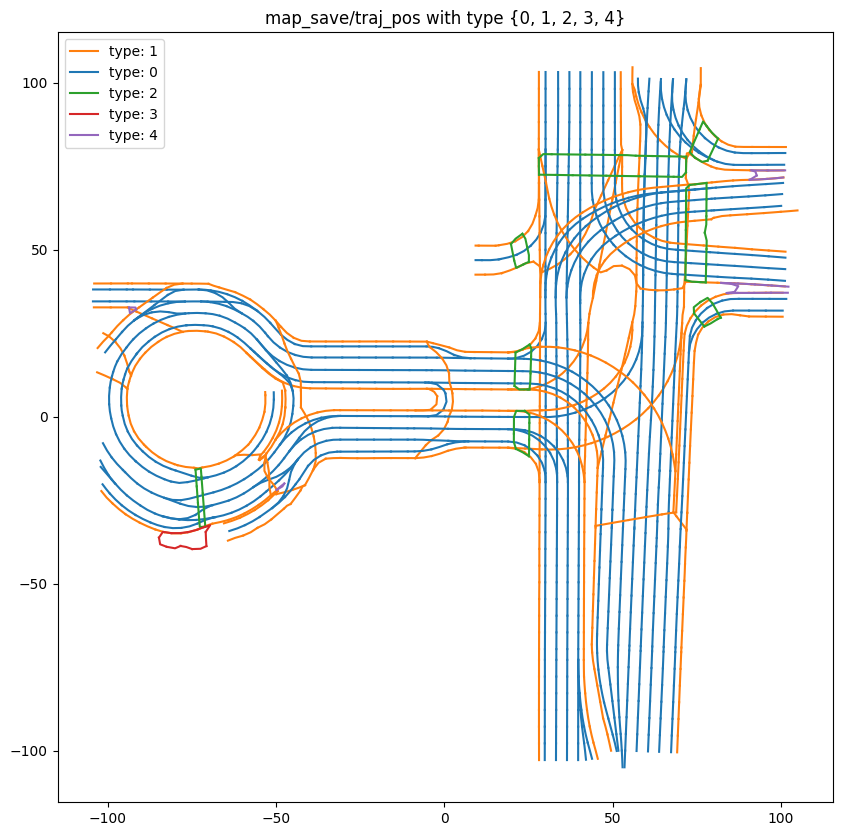

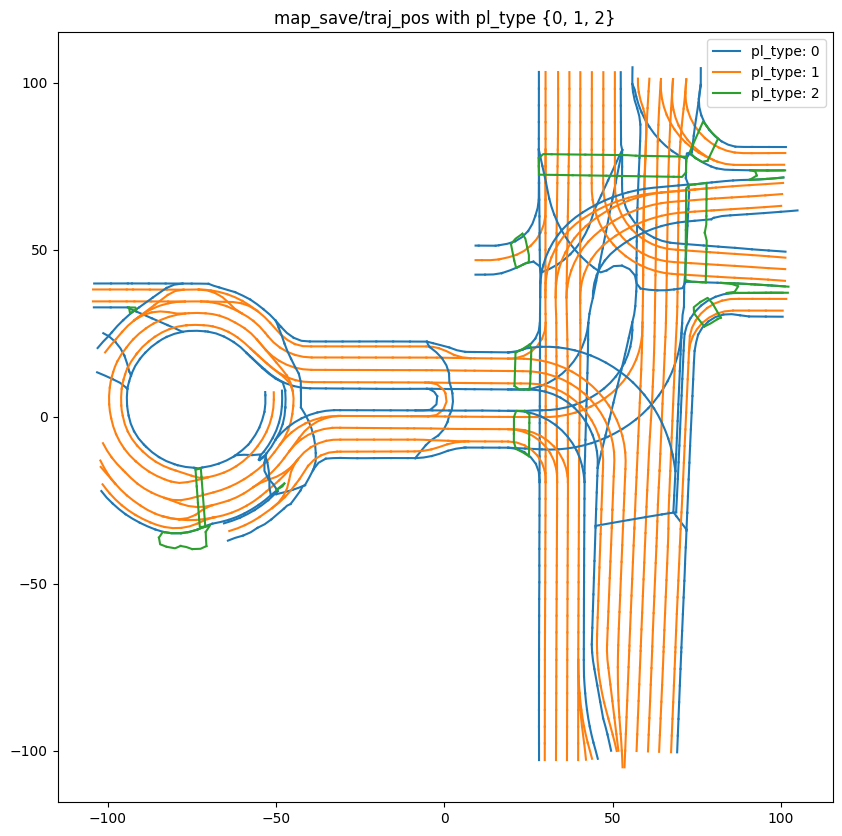

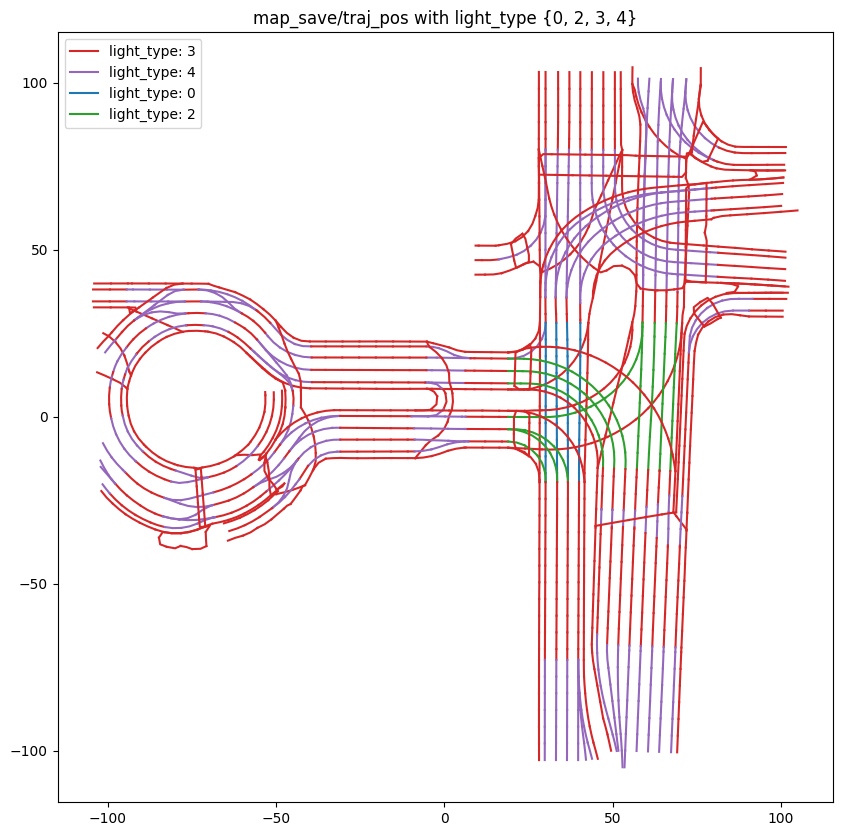

In [8]:
# pt_token:
#   type:
#     Tensor: shape: [3013], dtype: torch.uint8
#   pl_type:
#     Tensor: shape: [3013], dtype: torch.uint8
#   light_type:
#     Tensor: shape: [3013], dtype: torch.uint8
#   num_nodes: <class 'int'> - 3013
#     <class 'int'> - 3013

from asim.common.visualization.matplotlib.utils import add_non_repeating_legend_to_ax


fig, ax = plt.subplots(figsize=(10, 10))
traj_pos = data["map_save"]["traj_pos"]
type = data["pt_token"]["type"]
for i in range(traj_pos.shape[0]):
    ax.plot(traj_pos[i, :, 0], traj_pos[i, :, 1], color=TAB_10[type[i] % len(TAB_10)].hex, label=f"type: {type[i]}")
ax.set_title(f"map_save/traj_pos with type {set(type.tolist())}")
add_non_repeating_legend_to_ax(ax)
plt.show()


fig, ax = plt.subplots(figsize=(10, 10))
traj_pos = data["map_save"]["traj_pos"]
pl_type = data["pt_token"]["pl_type"]
for i in range(traj_pos.shape[0]):
    ax.plot(traj_pos[i, :, 0], traj_pos[i, :, 1], color=TAB_10[pl_type[i] % len(TAB_10)].hex, label=f"pl_type: {pl_type[i]}")
ax.set_title(f"map_save/traj_pos with pl_type {set(pl_type.tolist())}")
add_non_repeating_legend_to_ax(ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
traj_pos = data["map_save"]["traj_pos"]
light_type = data["pt_token"]["light_type"]
for i in range(traj_pos.shape[0]):
    ax.plot(traj_pos[i, :, 0], traj_pos[i, :, 1], color=TAB_10[light_type[i] % len(TAB_10)].hex, label=f"light_type: {light_type[i]}")
ax.set_title(f"map_save/traj_pos with light_type {set(light_type.tolist())}")
add_non_repeating_legend_to_ax(ax)
plt.show()

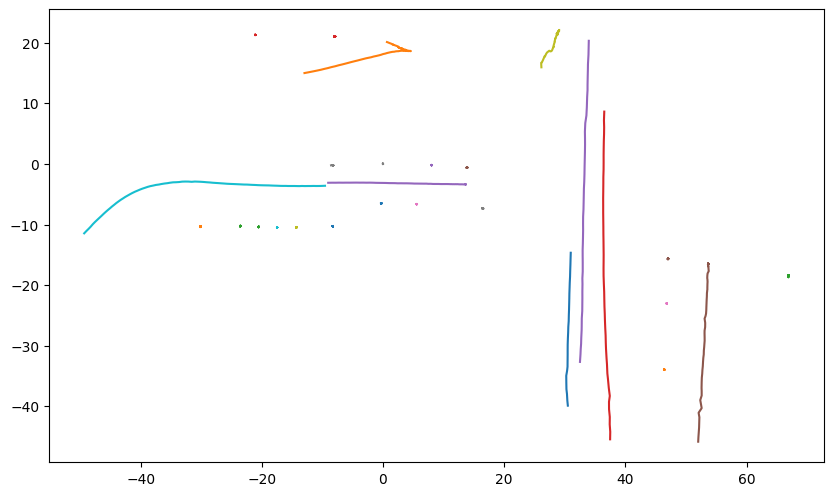

In [16]:
# agent:
#   num_nodes: <class 'int'> - 48
#     <class 'int'> - 48
#   valid_mask:
#     Tensor: shape: [48, 91], dtype: torch.bool
#   role:
#     Tensor: shape: [48, 3], dtype: torch.bool
#   id:
#     Tensor: shape: [48], dtype: torch.int64
#   type:
#     Tensor: shape: [48], dtype: torch.uint8
#   position:
#     Tensor: shape: [48, 91, 3], dtype: torch.float32
#   heading:
#     Tensor: shape: [48, 91], dtype: torch.float32
#   velocity:
#     Tensor: shape: [48, 91, 2], dtype: torch.float32
#   shape:
#     Tensor: shape: [48, 3], dtype: torch.float32

num_nodes = data["agent"]["num_nodes"]
valid_mask = data["agent"]["valid_mask"]
role = data["agent"]["role"].argmax(axis=-1)
id = data["agent"]["id"]
type = data["agent"]["type"]
position = data["agent"]["position"]
heading = data["agent"]["heading"]
velocity = data["agent"]["velocity"]
shape = data["agent"]["shape"]


fig, ax = plt.subplots(figsize=(10, 10))
for i in range(num_nodes):
    if type[i] == 1:
        continue

    position_mask = valid_mask[i]
    ax.plot(
        position[i, position_mask, 0],
        position[i, position_mask, 1],
        # color=TAB_10[type[i] % len(TAB_10)].hex,
        label=f"type: {type[i]}, id: {id[i]}, role: {role[i]}",
    )

# ax.legend()
ax.set_aspect('equal', adjustable='box')